In [1]:
import pandas as pd
import re
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyarabic import araby
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import seaborn as sns

In [2]:
data=pd.read_csv("AraFacts.csv")

In [3]:
data.head()

,ClaimID,claim,description,source,date,source_label,normalized_label,source_category,normalized_category,source_url,claim_urls,evidence_urls,claim_type
0,MIS_2952,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,تداول حساب على موقع التواصل الاجتماعي تيك توك،...,Misbar,2021-03-01,زائف,False,ترفيه,Other,https://misbar.com/factcheck/2021/03/01/لم-تعل...,"('https://www.youtube.com/watch?v=XQoJtu0VcnU',)",('https://twitter.com/PUBG/status/136483276092...,0
1,MIS_2951,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تتناقل صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-03-01,مضلل,Partly-false,رياضة,Other,https://misbar.com/factcheck/2021/03/01/تغطية-...,('https://www.facebook.com/Al3mla2qalktalony/p...,('https://www.businessinsider.com/kylian-mbapp...,0
2,FAT_1503,وفاة الفنان يوسف شعبان,انتشر على مواقع التواصل الاجتماعي خبر مفاده ...,Fatabyyano,2021-02-28 21:12:12+00:00,correct,True,اجتماعي,Social,https://fatabyyano.net/وفاة-الفنان-يوسف-شعبان-...,(),(),0
3,MIS_2946,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,تتداول حسابات وصفحات، على موقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الفيدي...,('https://twitter.com/KuwaitNews/status/136543...,('https://www.hindustantimes.com/india-news/ca...,2
4,MIS_2942,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,تتداول صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الصورة...,('https://web.facebook.com/news.djelfa17/posts...,('https://web.facebook.com/265332067662712/vid...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ClaimID              6222 non-null   object
 1   claim                6222 non-null   object
 2   description          6217 non-null   object
 3   source               6222 non-null   object
 4   date                 6222 non-null   object
 5   source_label         5515 non-null   object
 6   normalized_label     6222 non-null   object
 7   source_category      5467 non-null   object
 8   normalized_category  6222 non-null   object
 9   source_url           6222 non-null   object
 10  claim_urls           6222 non-null   object
 11  evidence_urls        6135 non-null   object
 12  claim_type           6222 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 632.0+ KB


In [5]:
data['source_label'].unique()

array([' زائف ', ' مضلل ', 'correct', 'misleading-title', 'fake',
       'misleading', ' إثارة ', 'مركّبة', 'خطأ', 'sarcastic', ' صحيح ',
       'غير صحيح', ' ساخر ', 'missing-content', ' انتقائي ', ' خرافة ',
       'صحيح', 'مضلل', 'مركّب', 'معلومات علميّة ناقصة', 'صحيح جزئياً',
       'مجتزأ', 'زائف', 'ساخر', nan, 'إثارة', 'partially-fake', 'انتقائي',
       'خرافة', 'مركب', 'احتيال', 'مشكوك فيه', 'opinion', 'deceptive',
       'غير دقيق', 'حقيقة'], dtype=object)

In [6]:
data['normalized_label'].unique()

array(['False', 'Partly-false', 'True', 'Sarcasm', 'Unverifiable'],
      dtype=object)

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


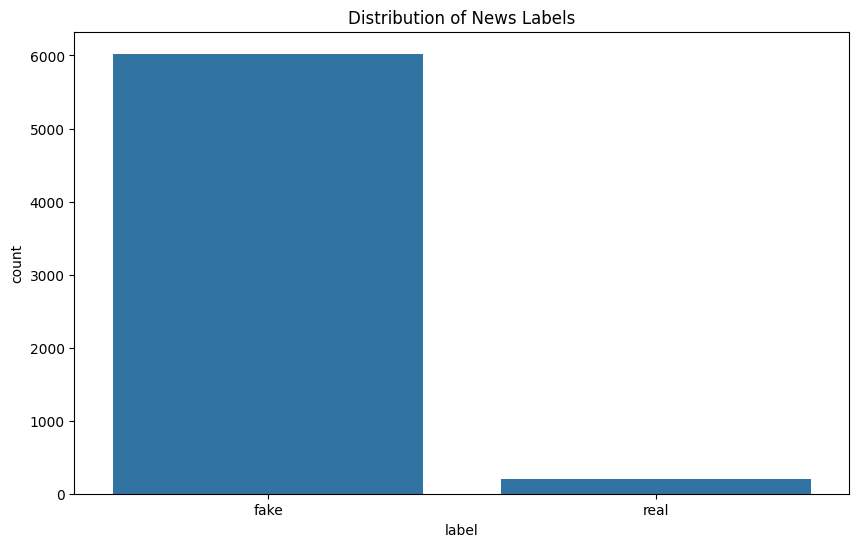

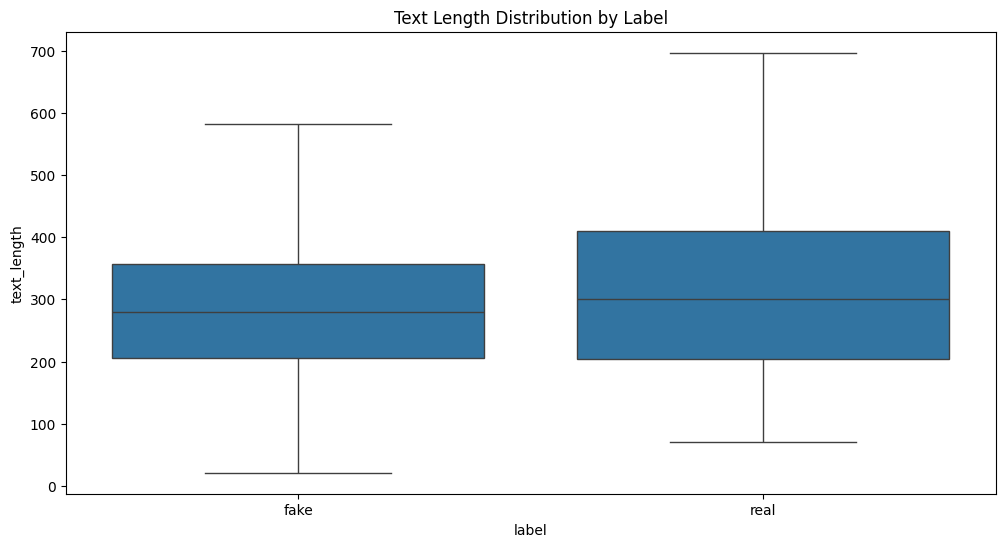

C:\Users\user\AppData\Local\Temp\ipykernel_12368\789673167.py:145: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_12368\789673167.py:146: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  plt.savefig(f"results/{title.replace(' ', '_')}.png", bbox_inches='tight', dpi=300)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


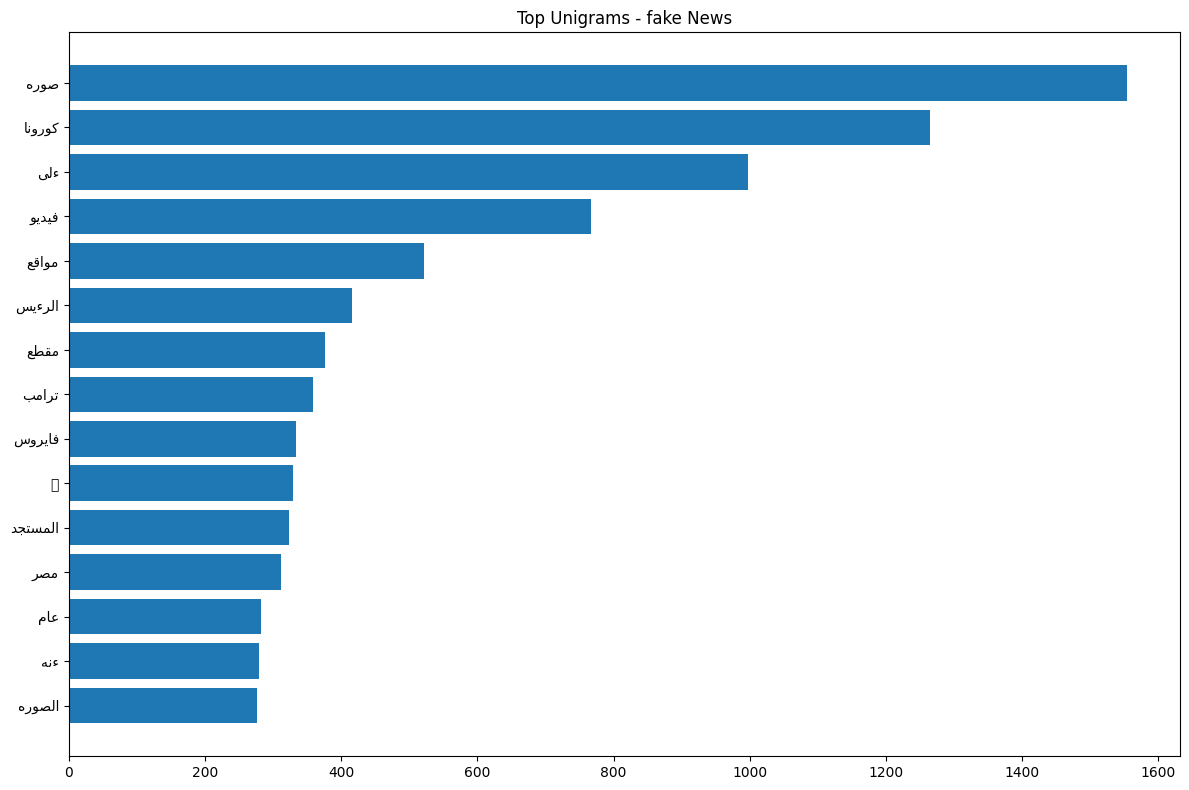

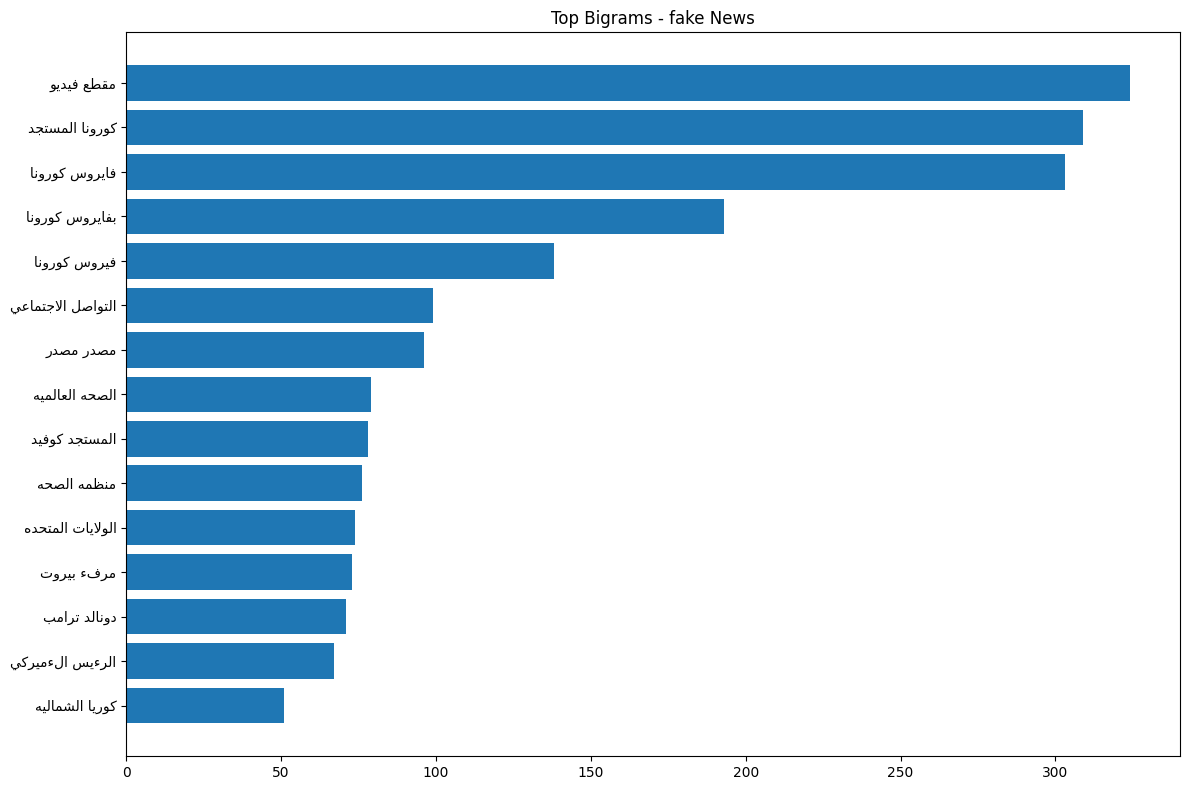

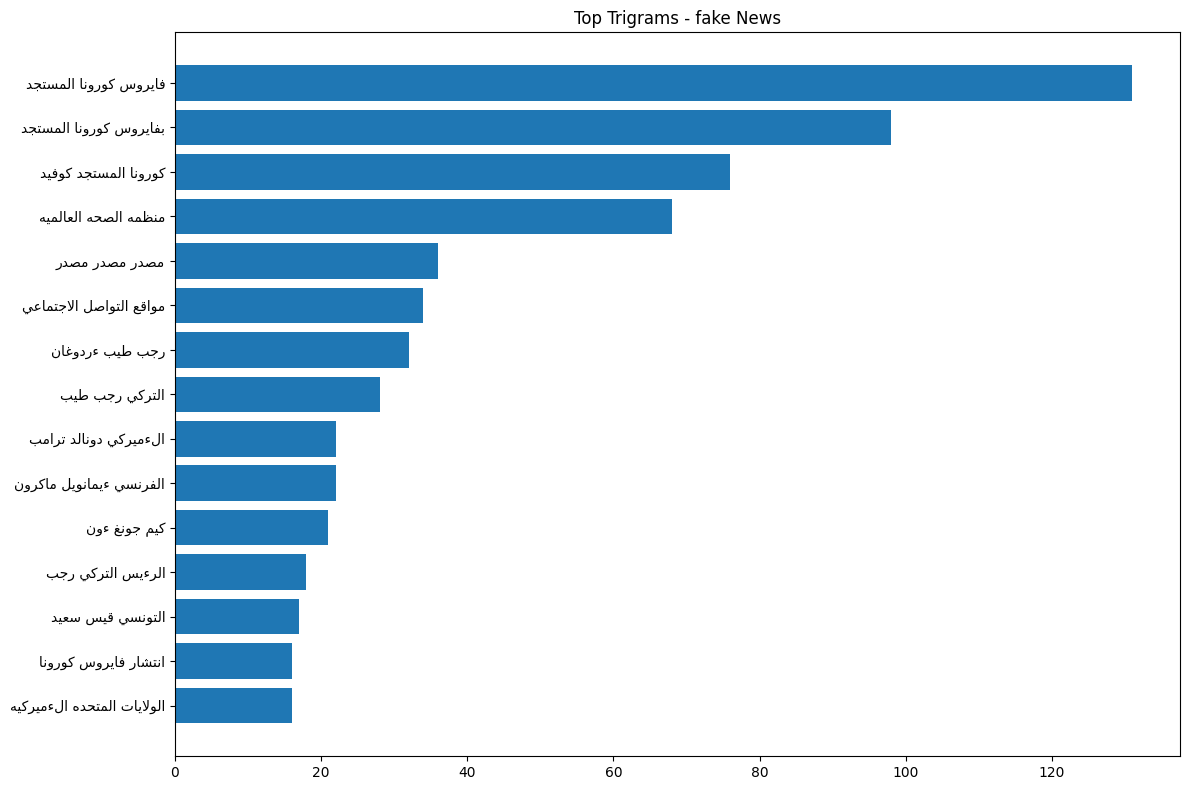

Wordcloud error: Only supported for TrueType fonts


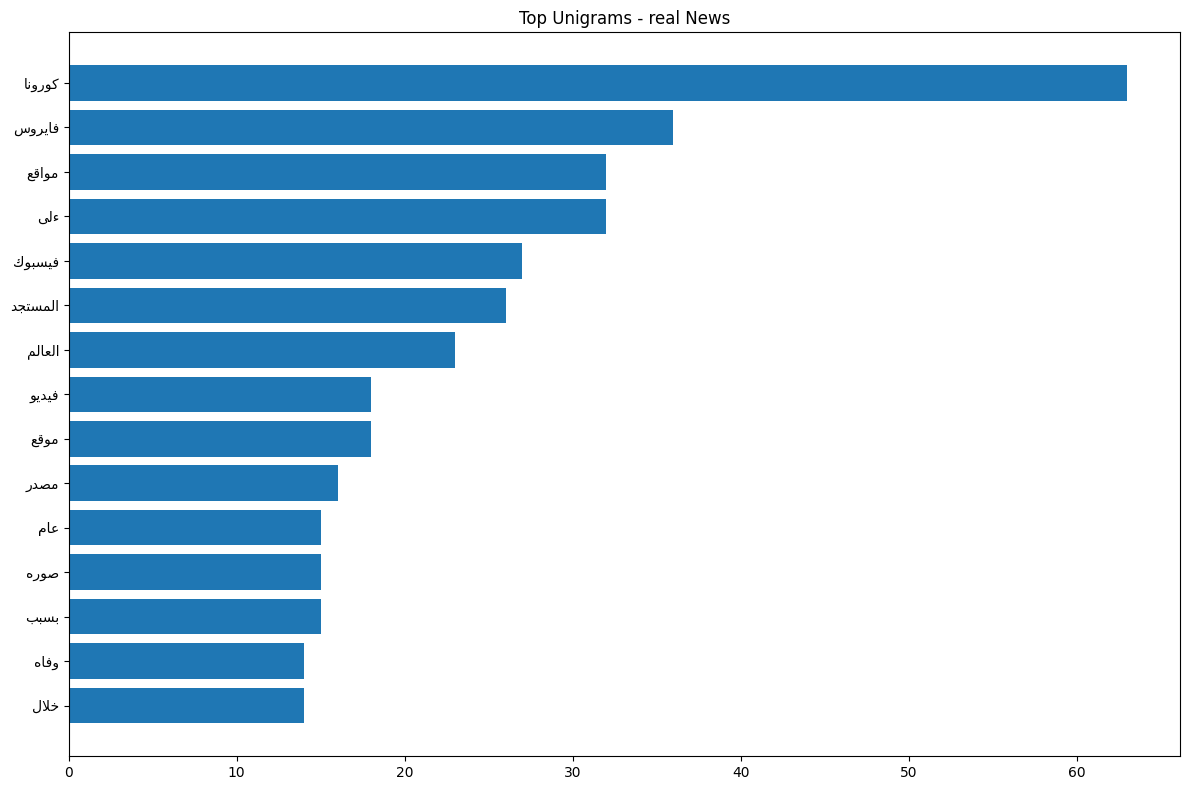

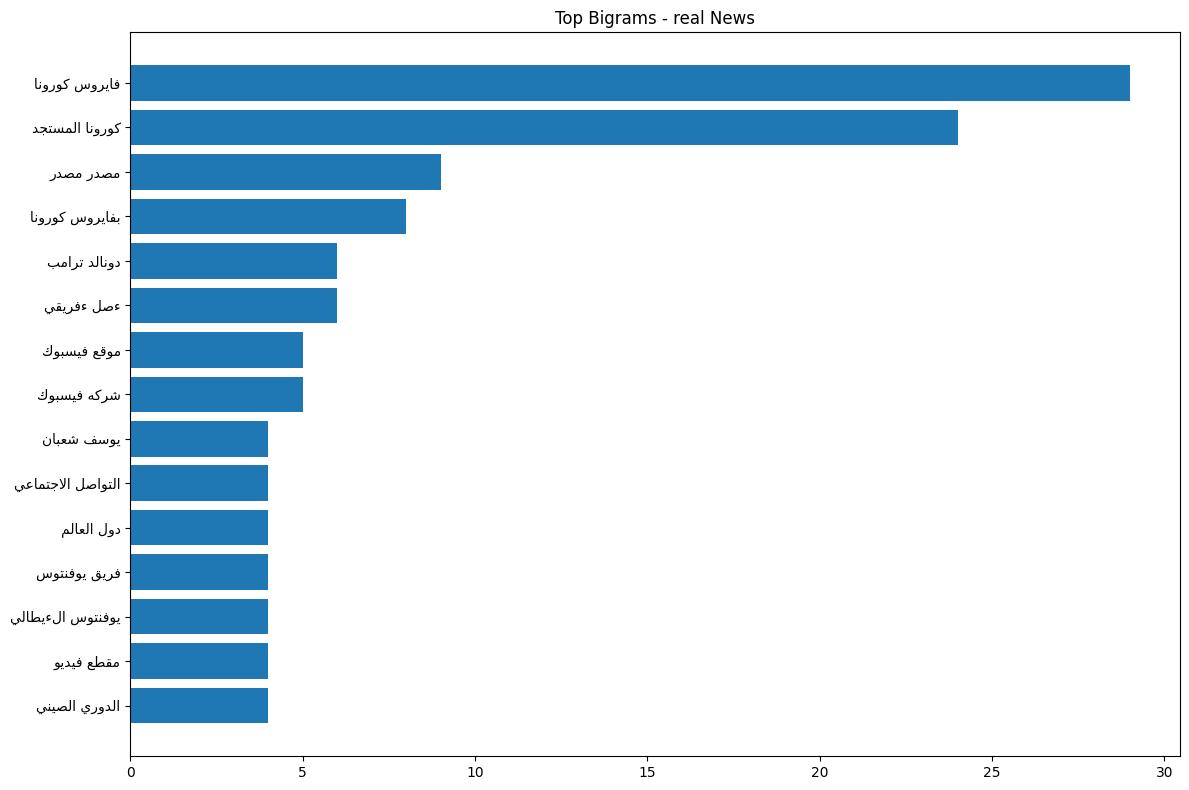

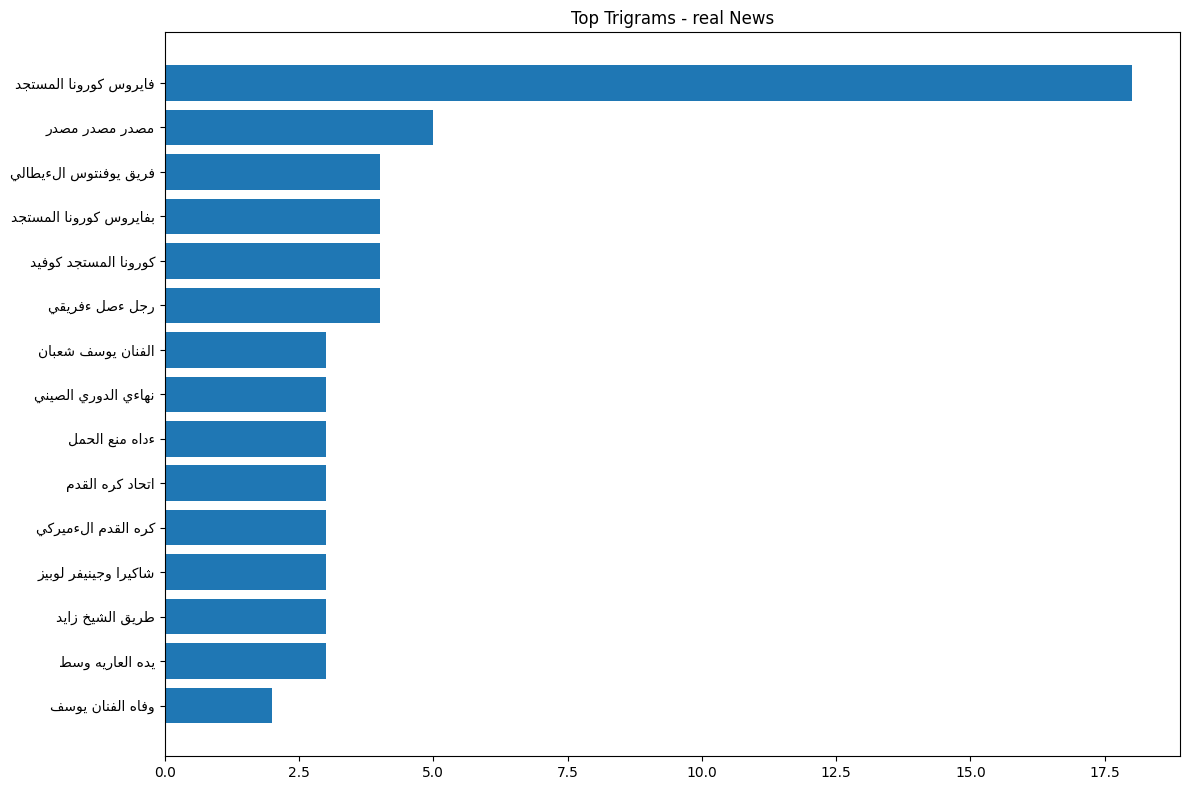

Wordcloud error: Only supported for TrueType fonts
Analysis completed successfully! Results saved in 'results' folder


In [18]:
import pandas as pd
import re
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyarabic import araby
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import seaborn as sns
import numpy as np
import os

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Create results directory if it doesn't exist
if not os.path.exists('results'):
    os.makedirs('results')

## ======================================
## Text Processing Functions
## ======================================

def load_data(filepath):
    """Load data from CSV file"""
    try:
        data = pd.read_csv(filepath)
        
        # Check for required columns
        required_cols = ['claim', 'description', 'normalized_label']
        missing_cols = [col for col in required_cols if col not in data.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")
            
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def clean_arabic_text(text):
    """Clean Arabic text by removing diacritics, normalizing characters, etc."""
    try:
        if pd.isna(text) or not isinstance(text, str):
            return ""
        
        # Remove diacritics
        text = araby.strip_diacritics(text)
        
        # Normalize characters
        text = araby.normalize_hamza(text)
        text = araby.normalize_teh(text)
        text = araby.normalize_ligature(text)
        
        # Remove URLs
        text = re.sub(r'http\S+|www.\S+', '', text)
        
        # Remove punctuation and special chars
        text = re.sub(r'[^\w\s\u0600-\u06FF]', ' ', text)
        
        # Remove English and numbers
        text = re.sub(r'[a-zA-Z0-9]', '', text)
        
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    except Exception as e:
        print(f"Error cleaning text: {e}")
        return ""

def arabic_tokenizer(text):
    """Tokenize Arabic text and remove stopwords"""
    try:
        tokens = araby.tokenize(text)
        arabic_stopwords = set(nltk.corpus.stopwords.words('arabic'))
        
        # Extended list of Arabic stopwords
        extra_stopwords = {
            'في', 'على', 'هذا', 'هذه', 'كان', 'يكون', 'قال', 'بين', 'قد',
            'عن', 'من', 'ما', 'لا', 'لكن', 'إن', 'أن', 'إذ', 'إذا', 'ذلك',
            'هو', 'هي', 'هم', 'وهو', 'وهي', 'وهم', 'فيه', 'عنه', 'إليه',
            'فإن', 'لكي', 'لديه', 'نحن', 'هنا', 'هناك', 'حيث', 'التي', 'الذي',
            'الذين', 'كل', 'بعض', 'أي', 'أنا', 'أنت', 'إنه', 'إلى', 'عندما',
            'كذلك', 'أيضا', 'قد', 'قد', 'فقط', 'بعد', 'قبل', 'حتى', 'علي',
            'عليها', 'عليه', 'أو', 'و', 'ف', 'ثم', 'حين', 'ضمن', 'بينما',
            'ماذا', 'كيف', 'لماذا', 'الآن', 'لقد', 'حول', 'ضمن', 'دون', 'يكون',
            'يكون', 'كانت', 'يكونون', 'تكون', 'يكون', 'ليست', 'ليس', 'ليست', 'لست'
        }
        
        arabic_stopwords.update(extra_stopwords)
        
        # Filter stopwords and short words
        tokens = [word for word in tokens if word not in arabic_stopwords]
        tokens = [word for word in tokens if len(word) > 2]
        return tokens
    except Exception as e:
        print(f"Tokenization error: {e}")
        return []

## ======================================
## N-grams Generation Functions
## ======================================

def generate_ngrams(tokens, n, min_freq=2):
    """Generate n-grams with frequency filtering"""
    try:
        ngs = list(ngrams(tokens, n))
        freq_dist = Counter(ngs)
        return [ng for ng in ngs if freq_dist[ng] >= min_freq]
    except Exception as e:
        print(f"N-grams generation error: {e}")
        return []

## ======================================
## Visualization Functions
## ======================================

def plot_arabic_ngrams(ngram_data, title, top_n=15):
    """Plot most frequent n-grams"""
    try:
        counter = Counter(ngram_data)
        top_items = counter.most_common(top_n)
        
        if not top_items:
            print(f"No n-grams to display for {title}")
            return
            
        terms, counts = zip(*top_items)
        
        # Prepare Arabic text for display
        display_terms = []
        for term in terms:
            if isinstance(term, tuple):
                term_text = ' '.join(term)
            else:
                term_text = term
            display_terms.append(get_display(reshape(term_text)))
        
        plt.figure(figsize=(12, 8))
        plt.barh(display_terms[::-1], counts[::-1])
        plt.title(get_display(reshape(title)))
        plt.tight_layout()
        plt.savefig(f"results/{title.replace(' ', '_')}.png", bbox_inches='tight', dpi=300)
        plt.show()
    except Exception as e:
        print(f"Visualization error: {e}")

def create_wordcloud(text, title, font_path='arial'):
    """Create word cloud from text"""
    try:
        if not text or not isinstance(text, str):
            print(f"No valid text for wordcloud: {title}")
            return
            
        # Clean text and remove stopwords
        cleaned_text = clean_arabic_text(text)
        tokens = arabic_tokenizer(cleaned_text)
        filtered_text = ' '.join(tokens)
        
        if not filtered_text:
            print(f"No text after filtering for wordcloud: {title}")
            return
            
        reshaped_text = get_display(reshape(filtered_text))
        
        wordcloud = WordCloud(
            font_path=font_path,
            width=1600,
            height=800,
            background_color='white',
            max_words=200,
            collocations=False
        ).generate(reshaped_text)
        
        plt.figure(figsize=(20, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(get_display(reshape(title)))
        plt.axis('off')
        plt.savefig(f"results/wordcloud_{title.replace(' ', '_')}.png", bbox_inches='tight', dpi=300)
        plt.show()
    except Exception as e:
        print(f"Wordcloud error: {e}")

def plot_label_distribution(data):
    """Plot distribution of news labels"""
    try:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x='label')
        plt.title('Distribution of News Labels')
        plt.savefig('results/label_distribution.png', bbox_inches='tight', dpi=300)
        plt.show()
    except Exception as e:
        print(f"Error plotting label distribution: {e}")

def plot_text_length_distribution(data):
    """Plot distribution of text lengths"""
    try:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=data, x='label', y='text_length', showfliers=False)
        plt.title('Text Length Distribution by Label')
        plt.savefig('results/text_length_distribution.png', bbox_inches='tight', dpi=300)
        plt.show()
    except Exception as e:
        print(f"Error plotting text length distribution: {e}")

## ======================================
## Main Analysis Function
## ======================================

def analyze_dataset(data):
    """Analyze the dataset"""
    try:
        # Create binary labels
        label_map = {
            'False': 'fake',
            'True': 'real',
            'Partly-false': 'fake',
            'Unverifiable': 'fake',
            'Sarcasm': 'fake'
        }
        data['label'] = data['normalized_label'].map(label_map).fillna('unknown')
        
        # Combine text fields
        data['combined_text'] = data['claim'].fillna('') + ' ' + data['description'].fillna('')
        
        # Clean and tokenize text
        data['cleaned_text'] = data['combined_text'].apply(clean_arabic_text)
        data['tokens'] = data['cleaned_text'].apply(arabic_tokenizer)
        
        # Generate n-grams
        data['unigrams'] = data['tokens'].apply(lambda x: generate_ngrams(x, 1))
        data['bigrams'] = data['tokens'].apply(lambda x: generate_ngrams(x, 2))
        data['trigrams'] = data['tokens'].apply(lambda x: generate_ngrams(x, 3))
        
        # Add text statistics
        data['text_length'] = data['cleaned_text'].apply(len)
        data['word_count'] = data['tokens'].apply(len)
        
        return data
    except Exception as e:
        print(f"Error analyzing dataset: {e}")
        return None

## ======================================
## Main Execution
## ======================================

# Load data
data = load_data("AraFacts.csv")

if data is not None:
    # Analyze data
    analyzed_data = analyze_dataset(data)
    
    if analyzed_data is not None:
        # Exploratory Data Analysis
        plot_label_distribution(analyzed_data)
        plot_text_length_distribution(analyzed_data)
        
        # Analysis by label
        for label in ['fake', 'real']:
            label_data = analyzed_data[analyzed_data['label'] == label]
            
            if len(label_data) == 0:
                continue
                
            # Aggregate n-grams
            all_unigrams = [item for sublist in label_data['unigrams'] for item in sublist]
            all_bigrams = [item for sublist in label_data['bigrams'] for item in sublist]
            all_trigrams = [item for sublist in label_data['trigrams'] for item in sublist]
            
            # Visualization
            plot_arabic_ngrams(all_unigrams, f'Top Unigrams - {label} News')
            plot_arabic_ngrams(all_bigrams, f'Top Bigrams - {label} News')
            plot_arabic_ngrams(all_trigrams, f'Top Trigrams - {label} News')
            
            # Word cloud
            combined_text = ' '.join(label_data['cleaned_text'].astype(str))
            create_wordcloud(combined_text, f'Word Cloud - {label} News')
        
        # Save processed data
        analyzed_data.to_csv('results/processed_arabic_news.csv', index=False, encoding='utf-8-sig')
        print("Analysis completed successfully! Results saved in 'results' folder")
    else:
        print("Failed to analyze data.")
else:
    print("Failed to load data. Please check the file path and format.")

Accuracy: 0.9655

Classification Report:
              precision    recall  f1-score   support

        fake       0.97      1.00      0.98      1202
        real       0.00      0.00      0.00        43

    accuracy                           0.97      1245
   macro avg       0.48      0.50      0.49      1245
weighted avg       0.93      0.97      0.95      1245



c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

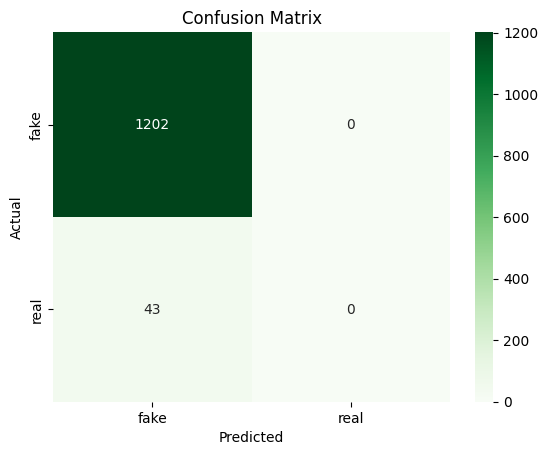

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# تحديد النصوص والليبلز
texts = data['cleaned_text']
labels = data['label']

# تحويل النصوص إلى خصائص باستخدام n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # (1,1)=unigram, (1,2)=uni+bi, (2,2)=bigrams
X = vectorizer.fit_transform(texts)
y = labels

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب النموذج
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# حساب الدقة
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# تقرير التصنيف
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# مصفوفة الالتباس
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



--- Random Undersampling ---
              precision    recall  f1-score   support

        fake       0.99      0.69      0.81      1205
        real       0.08      0.78      0.14        40

    accuracy                           0.69      1245
   macro avg       0.53      0.73      0.48      1245
weighted avg       0.96      0.69      0.79      1245



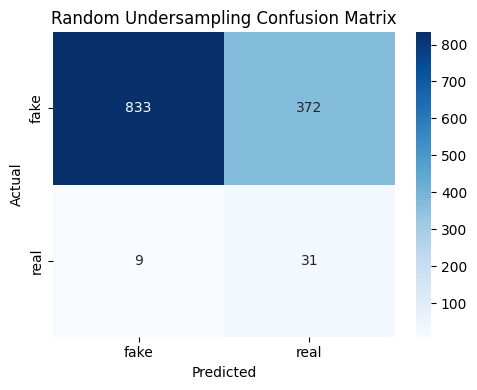


--- Hybrid Sampling ---
              precision    recall  f1-score   support

        fake       0.98      0.86      0.92      1205
        real       0.12      0.55      0.19        40

    accuracy                           0.85      1245
   macro avg       0.55      0.71      0.55      1245
weighted avg       0.96      0.85      0.89      1245



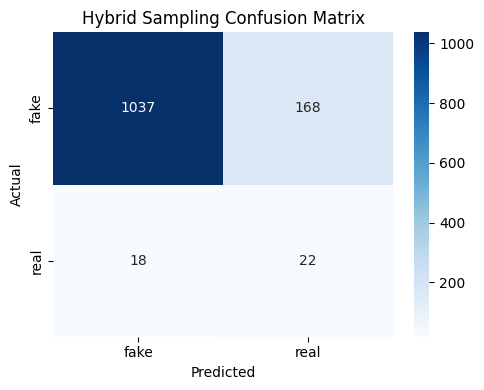

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 1)data loading:
data = load_data("AraFacts.csv")
data = analyze_dataset(data)


# 2) Prepare a clean DataFrame
df = data[['cleaned_text','label']].copy()
# keep only the binary classes
df = df[df.label.isin(['fake','real'])]
# encode labels: fake=0, real=1
df['label'] = df['label'].map({'fake': 0, 'real': 1})

# 3) Split into raw text train/test
X_train_txt, X_test_txt, y_train, y_test = train_test_split(
    df.cleaned_text, df.label,
    test_size=0.2,
    random_state=42,
    stratify=df.label
)

# 4) Build a train DataFrame for resampling
train_df = pd.DataFrame({'text': X_train_txt, 'label': y_train})

# ———————————————————————————————
# A) RANDOM UNDERSAMPLING
#   Downsample the majority class to the minority size
# ———————————————————————————————
majority = train_df[train_df.label == 0]
minority = train_df[train_df.label == 1]

majority_undersampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)
undersampled_df = pd.concat([majority_undersampled, minority])

# ———————————————————————————————
# B) HYBRID SAMPLING
#   1) Undersample majority to 2× minority
#   2) Oversample minority up to that same size
# ———————————————————————————————
maj_hybrid = resample(
    majority,
    replace=False,
    n_samples=len(minority) * 2,
    random_state=42
)
min_hybrid = resample(
    minority,
    replace=True,
    n_samples=len(maj_hybrid),
    random_state=42
)
hybrid_df = pd.concat([maj_hybrid, min_hybrid])

# ———————————————————————————————
# 5) A function to vectorize, train, and evaluate
# ———————————————————————————————
def train_and_evaluate(train_data: pd.DataFrame, title: str):
    # Vectorize on unigrams + bigrams
    vect = TfidfVectorizer(ngram_range=(1,2), max_features=5000, min_df=3)
    X_tr = vect.fit_transform(train_data['text'])
    X_te = vect.transform(X_test_txt)
    y_tr = train_data['label']
    
    # Train a simple Logistic Regression
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_tr, y_tr)
    
    # Predict & report
    y_pred = clf.predict(X_te)
    print(f"\n--- {title} ---")
    print(classification_report(y_test, y_pred, target_names=['fake','real']))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=['fake','real'],
                yticklabels=['fake','real'],
                cmap='Blues')
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# 6) Run both experiments
train_and_evaluate(undersampled_df, "Random Undersampling")
train_and_evaluate(hybrid_df,      "Hybrid Sampling")
